# Week 2

## The Ebola epidemic of 2014

* [West African Ebola virus epidemic timeline of reported cases and deaths](https://en.wikipedia.org/wiki/West_African_Ebola_virus_epidemic_timeline_of_reported_cases_and_deaths)
* [CSV format](https://github.com/juanklopper/JuliaCourseNotebooks/blob/master/wikipediaEVDraw.csv)

In [1]:
using DelimitedFiles
using Dates

In [2]:
wikiEVDraw = DelimitedFiles.readdlm("wikipediaEVDraw.csv", ',') # getting quotes right (single) is important!

54×9 Array{Any,2}:
 "25 Nov 2015"  28637  11314  3804  2536  …  4808     14122     3955
 "18 Nov 2015"  28634  11314  3804  2536     4808     14122     3955
 "11 Nov 2015"  28635  11314  3805  2536     4808     14122     3955
 "4 Nov 2015"   28607  11314  3810  2536     4808     14089     3955
 "25 Oct 2015"  28539  11298  3806  2535     4808     14061     3955
 "18 Oct 2015"  28476  11298  3803  2535  …  4808     14001     3955
 "11 Oct 2015"  28454  11297  3800  2534     4808     13982     3955
 "27 Sep 2015"  28388  11296  3805  2533     4808     13911     3955
 "20 Sep 2015"  28295  11295  3800  2532     4808     13823     3955
 "13 Sep 2015"  28220  11291  3792  2530     4808     13756     3953
 "6 Sep 2015"   28147  11291  3792  2530  …  4808     13683     3953
 "30 Aug 2015"  28073  11290  3792  2529     4808     13609     3953
 "16 Aug 2015"  27952  11284  3786  2524     4808     13494     3952
 ⋮                                        ⋱                     
 "9 Aug 2014"    18

## For loops and date-time formats

In [3]:
Dates.DateTime(wikiEVDraw[1,1], "d u y")

2015-11-25T00:00:00

In [4]:
for num = 3:7
    println("num is now $num")
end

num is now 3
num is now 4
num is now 5
num is now 6
num is now 7


In [5]:
testvalues = [23, "my name is not a name", 'α']
for x in testvalues
    println("The value of x is now $x")
end

The value of x is now 23
The value of x is now my name is not a name
The value of x is now α


In [6]:
mylist = [3, 2, 1]
count=1
for i in mylist
  mylist[i]=count
  count=count+1
end

In [7]:
mylist[3]

1

In [8]:
count=0
for i=1:3
  for j=1:3
    count=count+1
  end
end

count

9

In [9]:
col1 = wikiEVDraw[:, 1]

54-element Array{Any,1}:
 "25 Nov 2015"
 "18 Nov 2015"
 "11 Nov 2015"
 "4 Nov 2015"
 "25 Oct 2015"
 "18 Oct 2015"
 "11 Oct 2015"
 "27 Sep 2015"
 "20 Sep 2015"
 "13 Sep 2015"
 "6 Sep 2015"
 "30 Aug 2015"
 "16 Aug 2015"
 ⋮
 "9 Aug 2014"
 "30 Jul 2014"
 "23 Jul 2014"
 "14 Jul 2014"
 "2 Jul 2014"
 "17 Jun 2014"
 "27 May 2014"
 "12 May 2014"
 "1 May 2014"
 "14 Apr 2014"
 "31 Mar 2014"
 "22 Mar 2014"

In [10]:
for i = 1:length(col1)
    col1[i] = Dates.DateTime(col1[i], "d u y")
end

In [11]:
col1

54-element Array{Any,1}:
 2015-11-25T00:00:00
 2015-11-18T00:00:00
 2015-11-11T00:00:00
 2015-11-04T00:00:00
 2015-10-25T00:00:00
 2015-10-18T00:00:00
 2015-10-11T00:00:00
 2015-09-27T00:00:00
 2015-09-20T00:00:00
 2015-09-13T00:00:00
 2015-09-06T00:00:00
 2015-08-30T00:00:00
 2015-08-16T00:00:00
 ⋮
 2014-08-09T00:00:00
 2014-07-30T00:00:00
 2014-07-23T00:00:00
 2014-07-14T00:00:00
 2014-07-02T00:00:00
 2014-06-17T00:00:00
 2014-05-27T00:00:00
 2014-05-12T00:00:00
 2014-05-01T00:00:00
 2014-04-14T00:00:00
 2014-03-31T00:00:00
 2014-03-22T00:00:00

### Creating data giving time in days since 22 march 2014

In [12]:
Dates.datetime2rata(col1[1])

735927

### Export the converted data

In [13]:
dayssincemar22(x) = Dates.datetime2rata(x) - Dates.datetime2rata(col1[54])
epidays = Array{Int64}(undef,54)
for i = 1:length(col1)
    epidays[i] = dayssincemar22(col1[i])
end

In [14]:
wikiEVDraw[:, 1] = epidays
DelimitedFiles.writedlm("wikipediaEVDdatesconverted.csv", wikiEVDraw, ',')

In [15]:
data = [[3,2,1] [3,2,1] [3,2,1] [3,2,1] [3,2,1] [3,2,1] [3,2,1] [3,2,1] [6,5,4]]
data[3,:]

9-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 4

In [16]:
data

3×9 Array{Int64,2}:
 3  3  3  3  3  3  3  3  6
 2  2  2  2  2  2  2  2  5
 1  1  1  1  1  1  1  1  4

In [17]:
summedvals = 3
for k = 1:2:5
  println(k)
  summedvals = summedvals + k
end
summedvals

1
3
5


12

## Simple plots with the Plots package

In [18]:
# using Pkg
# Pkg.add("Plots")
using Plots

In [19]:
gr()

Plots.GRBackend()

In [20]:
epidays = wikiEVDraw[:, 1]
allcases = wikiEVDraw[:, 2]

54-element Array{Any,1}:
 28637
 28634
 28635
 28607
 28539
 28476
 28454
 28388
 28295
 28220
 28147
 28073
 27952
     ⋮
  1835
  1437
  1201
   982
   779
   528
   309
   260
   239
   176
   130
    49

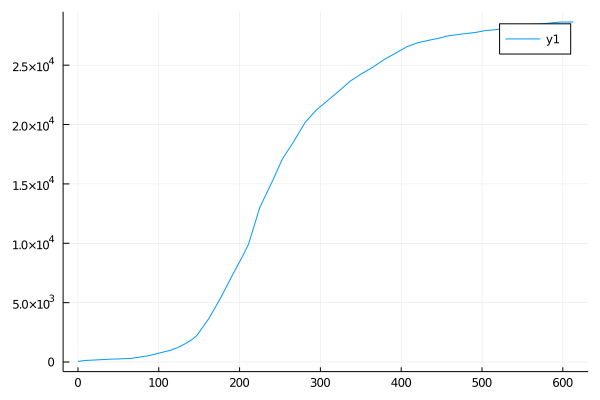

In [21]:
plot(epidays, allcases)

## Tweak the current plot

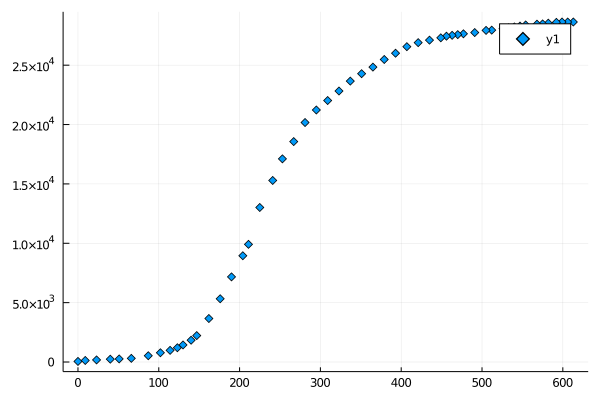

In [22]:
plot(epidays, allcases, linetype= :scatter, marker= :diamond)

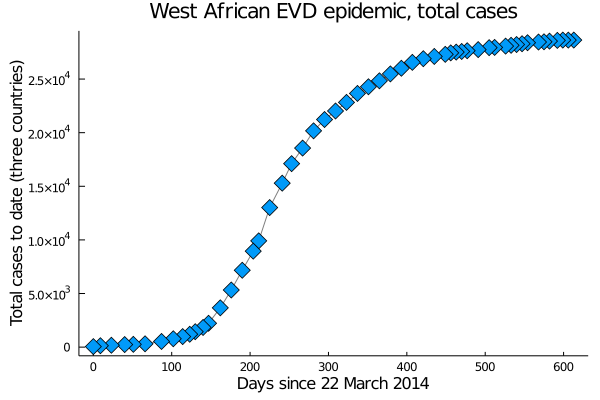

In [23]:
plot(epidays, allcases,
title="West African EVD epidemic, total cases",
xlabel="Days since 22 March 2014",
ylabel="Total cases to date (three countries)",
marker=(:diamond, 8),
line=(:path, "gray"),
legend=false,
grid=false)

### Save the current plot

In [24]:
savefig("WAfricanEVD_noformatspecified") # png as default
savefig("WAfricanEVD.pdf")
savefig("WAfricanEVD.png")

## Multiple curves in a single diagram

In [25]:
wikiEVDraw[end-9:end,:]

10×9 Array{Any,2}:
 123  1201  672  427  319  249     129     525     224
 114   982  613  411  310  174     106     397     197
 102   779  481  412  305  115      75     252     101
  87   528  337  398  264   33      24      97      49
  66   309  202  281  186   12      11      16       5
  51   260  182  248  171   12      11        "–"     "–"
  40   239  160  226  149   13      11        "-"     "-"
  23   176  110  168  108    8       2        "–"     "–"
   9   130   82  122   80    8       2        "–"     "–"
   0    49   29   49   29     "–"     "–"     "–"     "–"

In [26]:
a = rand()
println("a now has the value $a")
if a > 0.5
    println("this is quite a large value")
end

a now has the value 0.1302946166755492


In [27]:
for k = 1:8
    b = rand()
    println("b now has the value $b")
    if b > 0.5
        println("this is quite a large value")
    end
end

b now has the value 0.5478253690120212
this is quite a large value
b now has the value 0.847065800225687
this is quite a large value
b now has the value 0.815389997919058
this is quite a large value
b now has the value 0.592147702130464
this is quite a large value
b now has the value 0.20728666382010363
b now has the value 0.13652839565817732
b now has the value 0.4113068005791418
b now has the value 0.8912084522095913
this is quite a large value


In [28]:
rows, cols = size(wikiEVDraw)
for j = 1:cols
    for i = 1:rows
        if !isdigit(string(wikiEVDraw[i,j])[1])
            wikiEVDraw[i,j]=0
        end
    end
end

In [29]:
wikiEVDraw[end-9:end,:]

10×9 Array{Any,2}:
 123  1201  672  427  319  249  129  525  224
 114   982  613  411  310  174  106  397  197
 102   779  481  412  305  115   75  252  101
  87   528  337  398  264   33   24   97   49
  66   309  202  281  186   12   11   16    5
  51   260  182  248  171   12   11    0    0
  40   239  160  226  149   13   11    0    0
  23   176  110  168  108    8    2    0    0
   9   130   82  122   80    8    2    0    0
   0    49   29   49   29    0    0    0    0

### Plotting the different countries

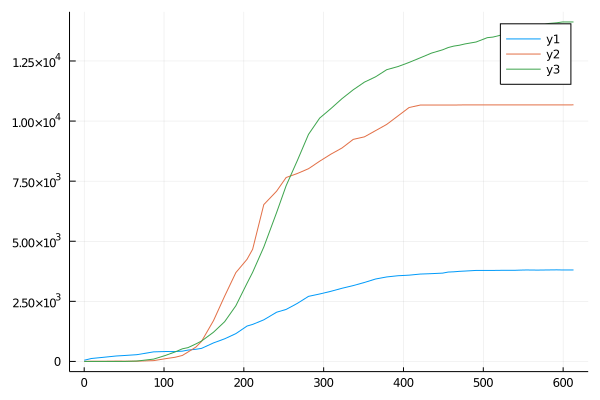

In [30]:
epidays = Array{Integer}(wikiEVDraw[:,1])
EVDcasesbycountry = Array{Integer}(wikiEVDraw[:, [4,6,8]])


using Plots
gr()
plot(epidays, EVDcasesbycountry)

### Customising the simultaneous plot

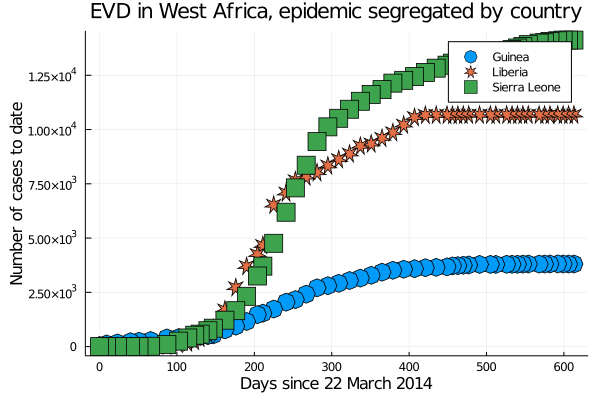

In [31]:
plot(epidays, EVDcasesbycountry,
marker=([:octagon :star7 :square],9),
label=["Guinea" "Liberia" "Sierra Leone"],
title="EVD in West Africa, epidemic segregated by country",
xlabel="Days since 22 March 2014",
ylabel="Number of cases to date",
line=(:scatter))

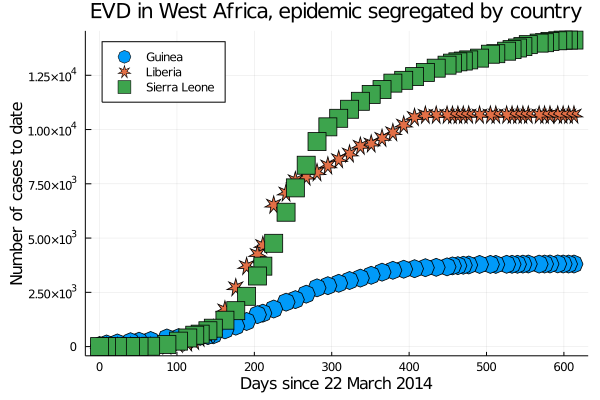

In [32]:
plot(epidays, EVDcasesbycountry,
legend=:topleft,
marker=([:octagon :star7 :square],9),
label=["Guinea" "Liberia" "Sierra Leone"],
title="EVD in West Africa, epidemic segregated by country",
xlabel="Days since 22 March 2014",
ylabel="Number of cases to date",
line=(:scatter))

In [33]:
savefig("L5testfig.pdf")

(-5, 36)
(-4, 15)
(-3, 0)
(-2, -9)
(-1, -12)
(0, -9)
(1, 0)
(2, 15)
(3, 36)
(4, 63)
(5, 96)


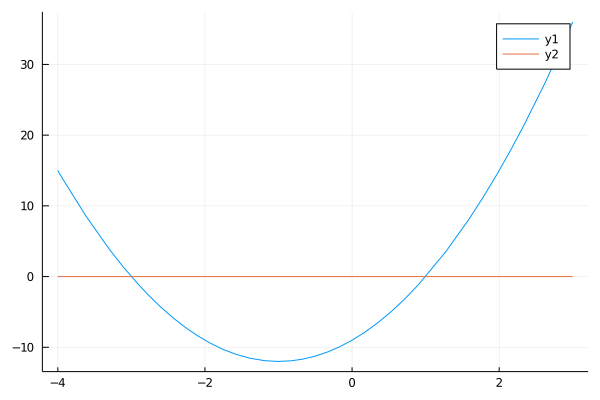

In [34]:
f(x) = 3 * x^2 + 6 * x - 9
for x = -5:5    
  println("(",x, ", ", f(x), ")")
end
using Plots
gr() # Activate the GR backend for use with Plots
plot(f, -4, 3) # plot f over [-4,4]
plot!(zero, -4, 3)

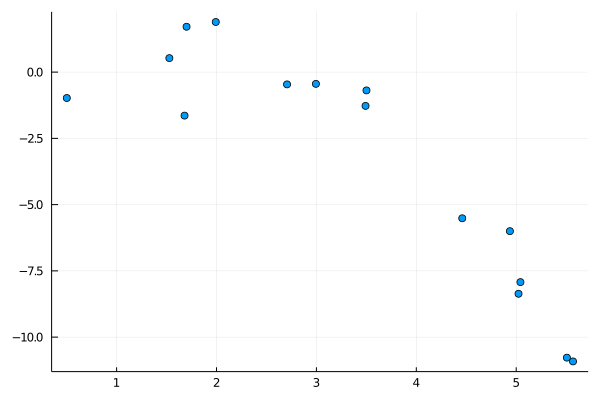

In [38]:
data = [1.6800483  -1.641695388; 
        0.501309281 -0.977697538; 
        1.528012113 0.52771122;
        1.70012253 1.711524991; 
        1.992493625 1.891000015;
        2.706075824 -0.463427794;
        2.994931927 -0.443566619;
        3.491852811 -1.275179133;
        3.501191722 -0.690499597;
        4.459924502 -5.516130799;
        4.936965851 -6.001703074;
        5.023289852 -8.36416901;
        5.04233698 -7.924477517;
        5.50739285 -10.77482371;
        5.568665171 -10.9171878]
using Plots
gr() # Activate the GR backend for use with Plots
# Use the data array to assign values for x and y here
plot(data[:,1], data[:,2], linetype = :scatter, leg = false) 
# scatter(x, y) # this is an alternative method, but does make a legend

In [46]:
testArray = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
testArray[end-3:end]

4-element Array{Int64,1}:
 17
 18
 19
 20

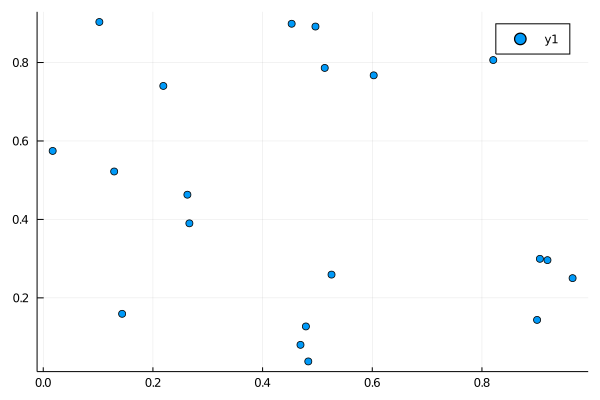

In [47]:
n = 20
x = sort(rand(20)); y = rand(20)
Plots.scatter(x, y)

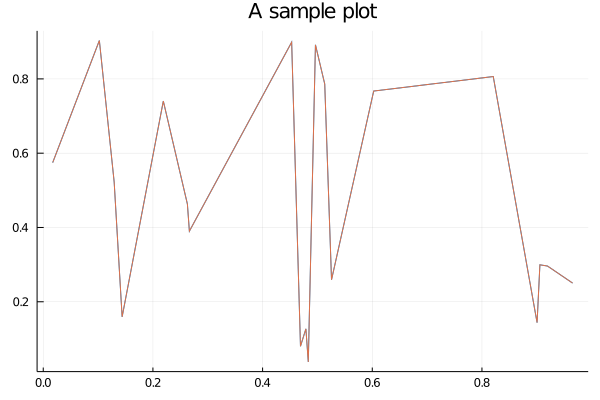

In [50]:
plot!(x, y, leg=false, title="A sample plot")

## Getting practice



In [51]:
my_date = "Oct 11 2016" # needs updating

using Dates
Dates.DateTime(my_date, "u d y")

2016-10-11T00:00:00

In [52]:
using Plots
pyplot() # Use PyPlot as a GUI (may already be the default)

x = collect(1:7)
y(x) = 2 - 2x + x^2/4

plot(x,y.(x))
plot!(x, y.(x), marker = :diamond, linewidth=2)
plot!(title = "Sample plot", leg=false)

LoadError: ArgumentError: Package PyPlot not found in current path:
- Run `import Pkg; Pkg.add("PyPlot")` to install the PyPlot package.


In [54]:
using Plots
pyplot() # Use PyPlot as a GUI (may already be the default)

x = collect(1:7)
y(x) = 2 - 2x + x^2/4

plot(x,y.(x))
plot!(x, y.(x), marker = :diamond, linewidth=2)
plot!(title = "Sample plot", leg=false)

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


LoadError: cannot define function y; it already has a value

In [55]:
# Assume the Plots package is being used
using Plots
gr() # Activate the GR backend for use with Plots

Plots.GRBackend()

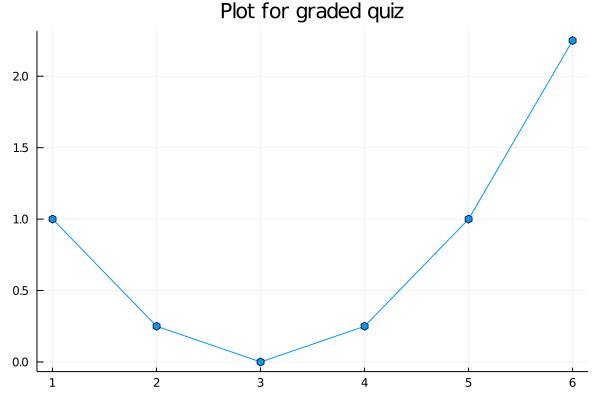

In [57]:
x = [1 2 3 4 5 6]'
y = (x.-3).^2/4
plot(x,y, marker = :hex, leg=false)
plot!(title="Plot for graded quiz", linewidth = 2, linecolor=:black)

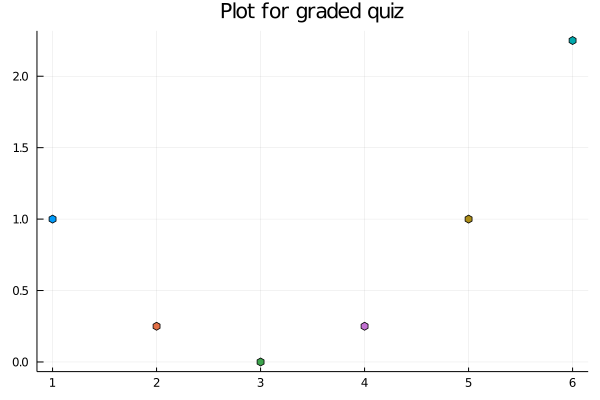

In [58]:
x = [1 2 3 4 5 6]
y = (x.-3).^2/4
plot(x,y, marker = :hex, leg=false, linewidth = 2, linecolor=:black)
plot!(title="Plot for graded quiz")

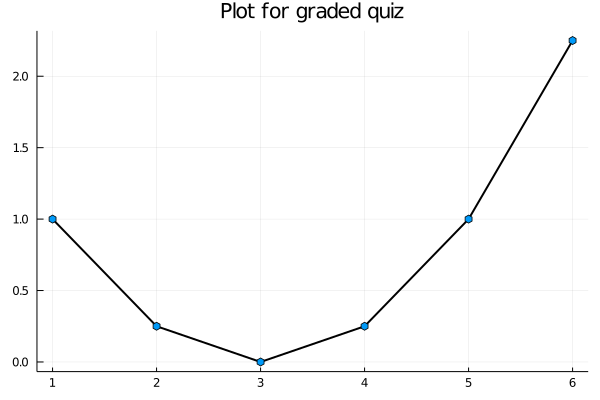

In [59]:
x = [1 2 3 4 5 6]'
y = (x.-3).^2/4
plot(x,y, marker = :hex, leg=false, linewidth = 2, linecolor=:black)
plot!(title="Plot for graded quiz")

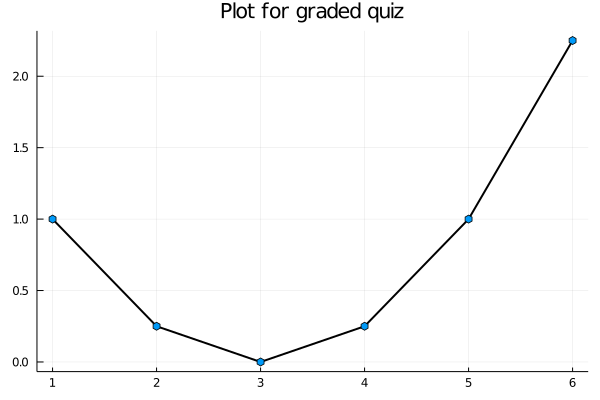

In [60]:
x = [1, 2, 3, 4, 5, 6]
y = (x.-3).^2/4
plot(x,y, marker = :hex, leg=false, linewidth = 2, linecolor=:black)
plot!(title="Plot for graded quiz")